# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Soyabean.csv', index_col = 'Date', parse_dates=True)

In [5]:
df

,Price
Date,
2021-06-01,127.5
2021-06-02,127.5
2021-06-03,127.5
2021-06-04,127.5
2021-06-05,127.5
...,...
2022-11-26,178.5
2022-11-27,173.5
2022-11-28,172.5


In [6]:
df.dropna()

,Price
Date,
2021-06-01,127.5
2021-06-02,127.5
2021-06-03,127.5
2021-06-04,127.5
2021-06-05,127.5
...,...
2022-11-26,178.5
2022-11-27,173.5
2022-11-28,172.5


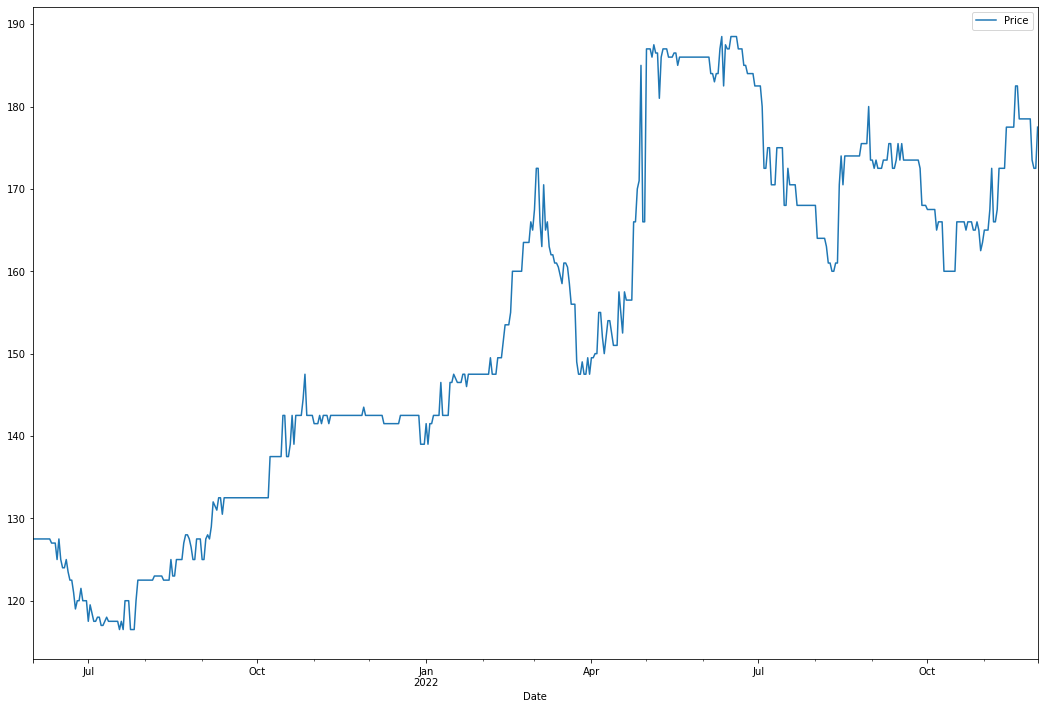

In [7]:
df.plot(figsize = (18, 12));

In [8]:
results = seasonal_decompose(df['Price'], model = 'addtive')

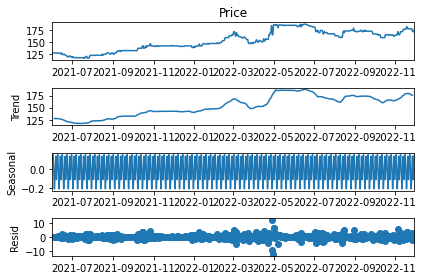

In [9]:
results.plot();

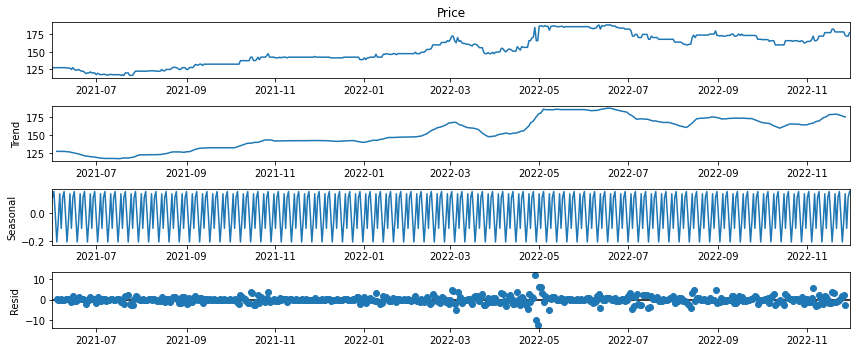

In [10]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

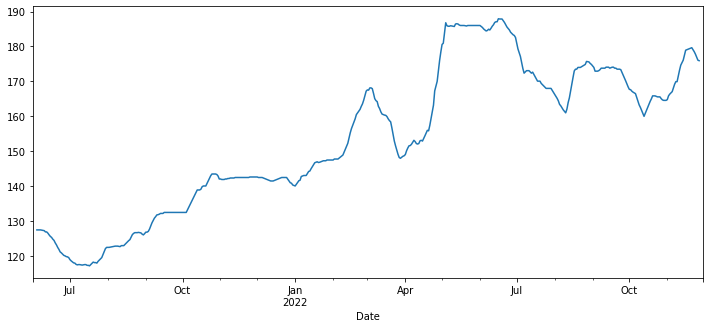

In [11]:
results.trend.plot()

In [12]:
df.index.freq = 'D'

In [13]:
df.head()

,Price
Date,
2021-06-01,127.5
2021-06-02,127.5
2021-06-03,127.5
2021-06-04,127.5
2021-06-05,127.5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [15]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [16]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [17]:
test_predictions = fitted_model.forecast(49)

In [18]:
test_predictions

2022-10-14    160.782914
2022-10-15    161.189174
2022-10-16    161.220454
2022-10-17    161.064202
2022-10-18    160.970452
2022-10-19    160.939225
2022-10-20    160.501762
2022-10-21    161.283011
2022-10-22    161.470520
2022-10-23    161.595539
2022-10-24    161.480310
2022-10-25    162.392058
2022-10-26    161.127354
2022-10-27    160.892054
2022-10-28    162.568495
2022-10-29    162.744961
2022-10-30    162.215542
2022-10-31    161.539058
2022-11-01    162.156675
2022-11-02    162.127263
2022-11-03    161.950798
2022-11-04    161.186093
2022-11-05    161.421384
2022-11-06    161.244896
2022-11-07    161.627262
2022-11-08    161.833149
2022-11-09    161.303732
2022-11-10    161.891955
2022-11-11    161.568448
2022-11-12    162.186096
2022-11-13    162.790978
2022-11-14    163.197239
2022-11-15    163.228519
2022-11-16    163.072267
2022-11-17    162.978517
2022-11-18    162.947290
2022-11-19    162.509826
2022-11-20    163.291076
2022-11-21    163.478584
2022-11-22    163.603603


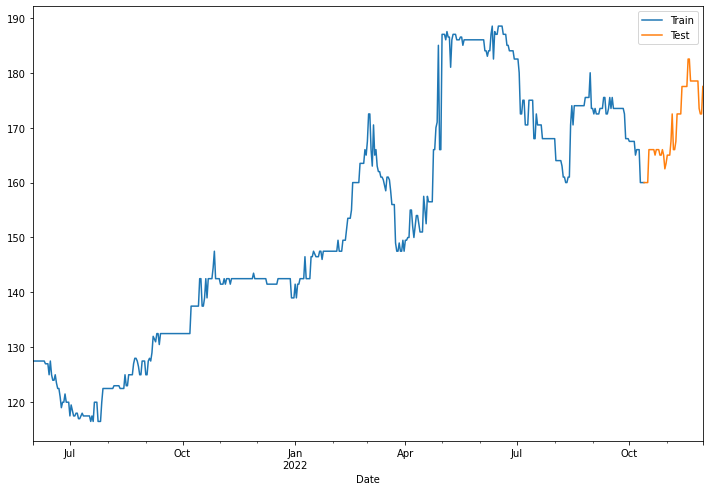

In [19]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [20]:
test_data.describe()

,Price
count,49.000000
mean,170.255102
std,6.567853
min,160.000000
25%,165.000000
50%,167.500000
75%,177.500000
max,182.500000


In [21]:
mean_absolute_error(test_data,test_predictions)


8.127584922317899

In [22]:
mean_squared_error(test_data, test_predictions)

95.920335249546

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(test_data, test_predictions)

array([11.48819849, 11.15559921, 11.13019385, 11.25739753, 11.33406711,
       11.35966141, 11.72109213, 11.0794752 , 10.92818556, 10.82794495,
       10.92031738, 10.20214768, 11.20589749, 11.39837788, 10.0667906 ,
        9.93270224, 10.33880416, 10.87316772, 10.38464615, 10.40759902,
       10.54598581, 11.15810337, 10.96772173, 11.1103629 , 10.80259081,
       10.63887405, 11.06270174, 10.59238307, 10.84962218, 10.36171829,
        9.89795399,  9.59529982,  9.57231544,  9.68759399,  9.75730723,
        9.78061678, 10.11165894,  9.52649016,  9.39028982,  9.30047242,
        9.38322723,  8.74855057,  9.64086322,  9.81591204,  8.63146507,
        8.51640756,  8.86765373,  9.34094955,  8.9077981 ])

In [25]:
np.sqrt(mean_squared_error(test_data, test_predictions))

9.793892752605881

In [26]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [27]:
forecast_predictions = final_model.forecast(60)

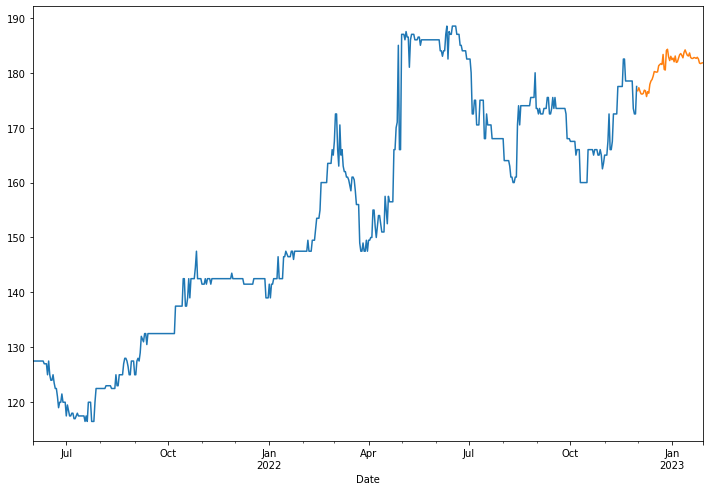

In [28]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [29]:
forecast_predictions

2022-12-01    176.720702
2022-12-02    177.276169
2022-12-03    176.664872
2022-12-04    176.164897
2022-12-05    176.109304
2022-12-06    176.220491
2022-12-07    176.831347
2022-12-08    176.720260
2022-12-09    175.664780
2022-12-10    176.553795
2022-12-11    176.275852
2022-12-12    177.887090
2022-12-13    178.497913
2022-12-14    178.775799
2022-12-15    179.386990
2022-12-16    180.220298
2022-12-17    180.164611
2022-12-18    180.109196
2022-12-19    180.164649
2022-12-20    181.275641
2022-12-21    181.497845
2022-12-22    181.664711
2022-12-23    181.497795
2022-12-24    183.331279
2022-12-25    180.608944
2022-12-26    180.498125
2022-12-27    184.053754
2022-12-28    184.276096
2022-12-29    182.887277
2022-12-30    182.220793
2022-12-31    182.998455
2023-01-01    182.387431
2023-01-02    182.665282
2023-01-03    181.998663
2023-01-04    183.054154
2023-01-05    181.887229
2023-01-06    181.998412
2023-01-07    182.664820
2023-01-08    183.275947
2023-01-09    183.498014


# *SARIMAX*

In [30]:
from datetime import datetime

In [31]:
df_KN = pd.read_csv('Soyabean.csv', index_col = 'Date', parse_dates = True)

In [32]:
df_KN.index.freq ='D'

In [33]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [34]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adf_test(df_KN['Price'])

ADF Statistics: -1.3128075531618622
p- value: 0.6232926632105295
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [36]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [37]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,127.5,NaN
2021-06-02,127.5,0.0
2021-06-03,127.5,0.0
2021-06-04,127.5,0.0
2021-06-05,127.5,0.0


In [38]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -1.3128075531618622
p- value: 0.6232926632105295
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [39]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [40]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -9.642448875768594
p- value: 1.5082238427429783e-16
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [41]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [42]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -4.628648033583519
p- value: 0.00011434330740691259
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


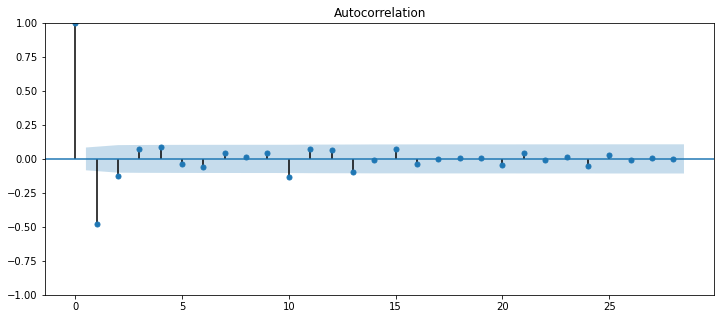

In [43]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

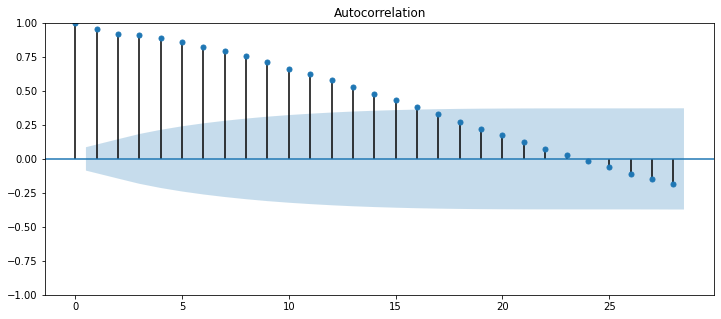

In [44]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

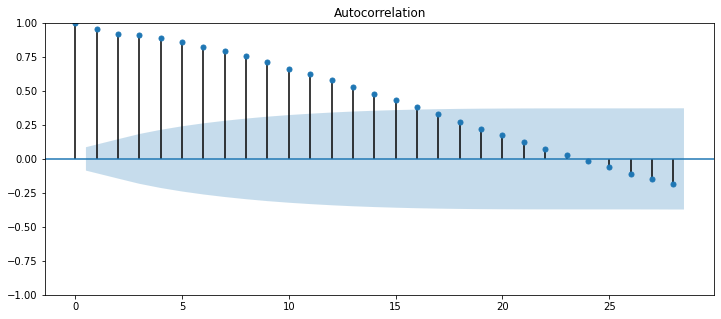

In [45]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

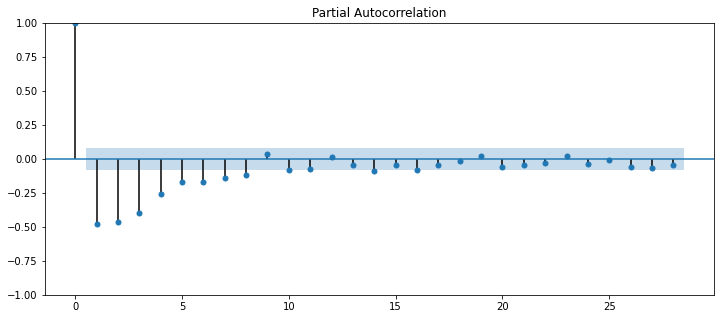

In [46]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [47]:

from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [48]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [49]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [50]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,167.5,0.0,0.5,-5.0
2022-10-03,167.5,0.0,0.0,-6.0
2022-10-04,167.5,0.0,0.0,-5.0
2022-10-05,167.5,0.0,0.0,-5.0
2022-10-06,165.0,-2.5,-2.5,-7.5
2022-10-07,166.0,1.0,3.5,-7.5
2022-10-08,166.0,0.0,-1.0,-7.5
2022-10-09,166.0,0.0,0.0,-7.5
2022-10-10,160.0,-6.0,-6.0,-15.5


In [51]:
import statsmodels.api as sm

In [52]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pmdarima import ARIMA

In [55]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,127.5,NaN,NaN,NaN
2021-06-02,127.5,0.0,NaN,NaN
2021-06-03,127.5,0.0,0.0,NaN
2021-06-04,127.5,0.0,0.0,NaN
2021-06-05,127.5,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,172.5,-1.0,-1.0,-3.0
2022-09-28,168.0,-4.5,-3.5,-7.5
2022-09-29,168.0,0.0,4.5,-12.0


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [58]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [59]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood               -1160.934
Date:                             Sat, 07 Jan 2023   AIC                           2339.867
Time:                                     00:07:40   BIC                           2377.009
Sample:                                 06-01-2021   HQIC                          2354.495
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0005      0.037     26.962      0.000       0.928       1.073
ar.L2          0.8907      0.059     14.979      0.000       0.774       1.007
ar.L3         -0.9019      0.038    -23.841      0.000      -0.976      -0.828
ma.L1         -0.2631      0.055     -4.745      0.000      -0.372      -0.154
ma.L2         -1.1448      0.059    -19.429      0.000      -1.260      -1.029
ma.L3          0.3769      0.051      7.323      0.000       0.276       0.478
ma.L4          0.2316      0.049      4.766      0.000       0.136       0.327
ma.L5         -0.0431      0.047     -0.917      0.359      -0.135       0.049
sigma2         9.2311      0.329     28.056      0.000       8.586       9.876
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1494.61
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.75   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [61]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

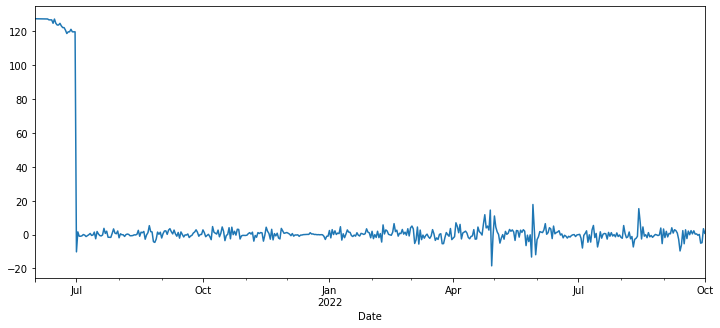

In [62]:
model_SARIMAX_fit.resid.plot()

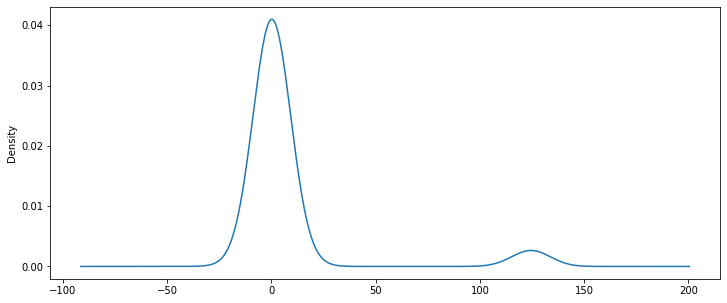

In [63]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [64]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [65]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,167.5,0.0,0.5,-5.0,165.263959
2022-10-03,167.5,0.0,0.0,-6.0,165.450199
2022-10-04,167.5,0.0,0.0,-5.0,164.701349
2022-10-05,167.5,0.0,0.0,-5.0,164.075194
2022-10-06,165.0,-2.5,-2.5,-7.5,164.352961
2022-10-07,166.0,1.0,3.5,-7.5,164.878476
2022-10-08,166.0,0.0,-1.0,-7.5,165.215872
2022-10-09,166.0,0.0,0.0,-7.5,164.880319
2022-10-10,160.0,-6.0,-6.0,-15.5,167.273038


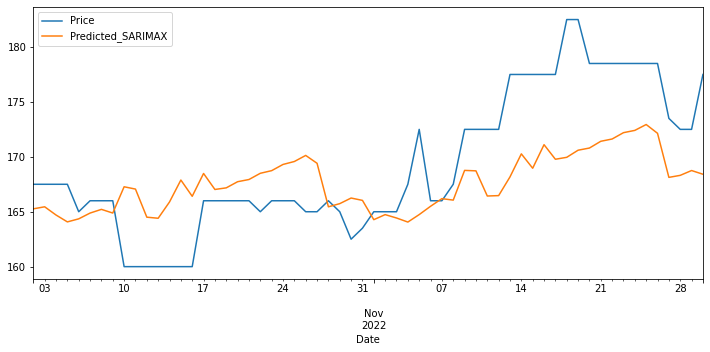

In [66]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [67]:
pred_Sarimax

2022-10-02    165.263959
2022-10-03    165.450199
2022-10-04    164.701349
2022-10-05    164.075194
2022-10-06    164.352961
2022-10-07    164.878476
2022-10-08    165.215872
2022-10-09    164.880319
2022-10-10    167.273038
2022-10-11    167.062800
2022-10-12    164.504874
2022-10-13    164.405735
2022-10-14    165.889903
2022-10-15    167.887323
2022-10-16    166.405392
2022-10-17    168.484766
2022-10-18    167.027944
2022-10-19    167.174859
2022-10-20    167.734060
2022-10-21    167.934520
2022-10-22    168.500651
2022-10-23    168.741283
2022-10-24    169.305488
2022-10-25    169.573722
2022-10-26    170.127596
2022-10-27    169.411817
2022-10-28    165.447590
2022-10-29    165.737256
2022-10-30    166.247936
2022-10-31    166.033672
2022-11-01    164.277118
2022-11-02    164.737013
2022-11-03    164.431325
2022-11-04    164.059855
2022-11-05    164.740346
2022-11-06    165.495952
2022-11-07    166.192555
2022-11-08    166.058117
2022-11-09    168.764476
2022-11-10    168.723202


In [68]:
predicted_value_SARIMA = pred_Sarimax

In [69]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [70]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

4.378619303436945

In [71]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

27.913576515592

In [72]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

5.283330059308428

# ***FB Prophet***

In [73]:
df_fb  = pd.read_csv('Soyabean.csv')

In [74]:
df_fb.columns = ['ds', 'y']

In [75]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [76]:
df_fb.head()

,ds,y
0,2021-06-01,127.5
1,2021-06-02,127.5
2,2021-06-03,127.5
3,2021-06-04,127.5
4,2021-06-05,127.5


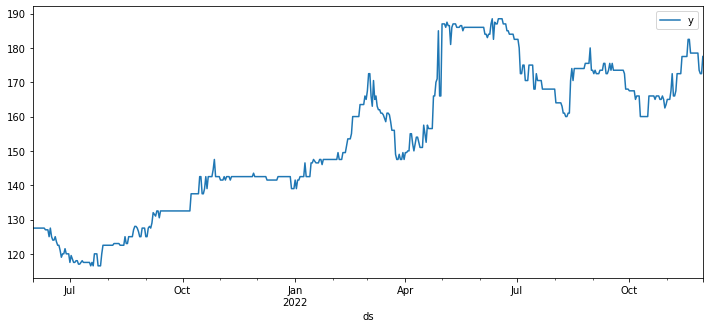

In [77]:
df_fb.plot(x='ds', y='y')

In [78]:
len(df_fb)

548

In [79]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [80]:
import prophet

In [81]:
import io, os, sys, setuptools, tokenize

In [82]:
from fbprophet import Prophet

In [83]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,160.417950,150.746175,170.142356,154.348938,166.975649,-0.180023,-0.180023,-0.180023,-0.180023,-0.180023,-0.180023,0.0,0.0,0.0,160.237927
544,2022-11-27,160.292481,151.862859,169.925129,153.976174,167.025411,0.217740,0.217740,0.217740,0.217740,0.217740,0.217740,0.0,0.0,0.0,160.510221
545,2022-11-28,160.167012,150.231934,169.977093,153.552622,167.186333,-0.095376,-0.095376,-0.095376,-0.095376,-0.095376,-0.095376,0.0,0.0,0.0,160.071636
546,2022-11-29,160.041543,150.094730,170.102835,153.293348,167.285835,0.165836,0.165836,0.165836,0.165836,0.165836,0.165836,0.0,0.0,0.0,160.207379
547,2022-11-30,159.916074,149.916861,169.649364,153.024560,167.332521,0.169040,0.169040,0.169040,0.169040,0.169040,0.169040,0.0,0.0,0.0,160.085113


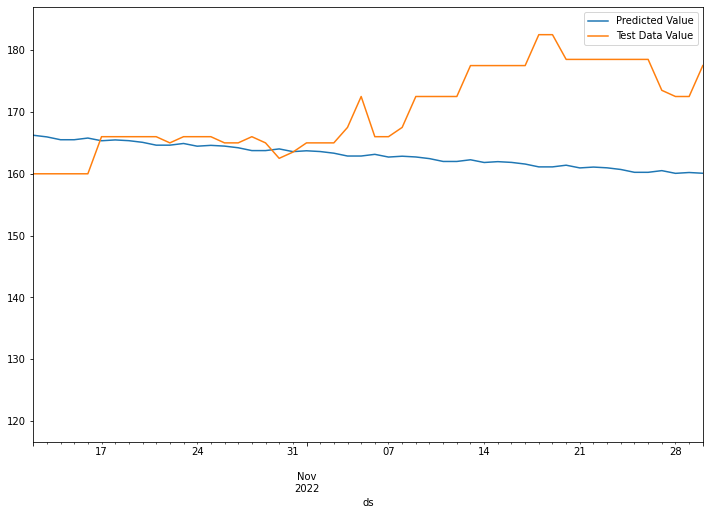

In [85]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [86]:
from statsmodels.tools.eval_measures import rmse

In [87]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [88]:
predictions_fb

488    167.536495
489    167.097909
490    167.233653
491    167.111387
492    166.845016
493    166.386055
494    166.385916
495    166.658211
496    166.219625
497    166.355368
498    166.233102
499    165.966732
500    165.507770
501    165.507632
502    165.779926
503    165.341341
504    165.477084
505    165.354818
506    165.088447
507    164.629486
508    164.629348
509    164.901642
510    164.463057
511    164.598800
512    164.476534
513    164.210163
514    163.751202
515    163.751064
516    164.023358
517    163.584772
518    163.720516
519    163.598250
520    163.331879
521    162.872918
522    162.872779
523    163.145074
524    162.706488
525    162.842232
526    162.719966
527    162.453595
528    161.994634
529    161.994495
530    162.266790
531    161.828204
532    161.963947
533    161.841682
534    161.575311
535    161.116350
536    161.116211
537    161.388505
538    160.949920
539    161.085663
540    160.963397
541    160.697026
542    160.238065
543    160

In [89]:
test_fb

,ds,y
488,2022-10-02,167.5
489,2022-10-03,167.5
490,2022-10-04,167.5
491,2022-10-05,167.5
492,2022-10-06,165.0
493,2022-10-07,166.0
494,2022-10-08,166.0
495,2022-10-09,166.0
496,2022-10-10,160.0
497,2022-10-11,160.0


In [90]:
mean_absolute_error(test_fb['y'], predictions_fb)

7.182964509150673

In [91]:
mean_squared_error(test_fb['y'], predictions_fb)

99.25685836093459

In [92]:
rmse(predictions_fb, test_fb['y'])

9.962773627907772

In [93]:
test_fb.mean()

y    169.258333
dtype: float64

In [94]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [95]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [96]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,170.604735,166.346427,174.590608,164.0,2022-08-02
1,2022-08-04,170.186026,166.176253,174.442825,164.0,2022-08-02
2,2022-08-05,169.586982,165.468259,173.473879,164.0,2022-08-02
3,2022-08-06,169.442112,165.611243,173.424391,164.0,2022-08-02
4,2022-08-07,169.592307,165.631923,173.616646,163.0,2022-08-02


In [98]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,41.913566,6.474069,6.415526,0.039313,0.038996,0.000000
1,7 days,45.552070,6.749227,6.663127,0.040976,0.039082,0.000000
2,8 days,52.971573,7.278157,7.148550,0.044167,0.045318,0.000000
3,9 days,60.325836,7.766971,7.664030,0.047531,0.050222,0.000000
4,10 days,63.746060,7.984113,7.937147,0.049330,0.050222,0.000000
5,11 days,64.520862,8.032488,7.994420,0.049770,0.050222,0.000000
6,12 days,54.608234,7.389738,7.049897,0.043764,0.047115,0.166667
7,13 days,50.579781,7.111946,6.772370,0.041543,0.043530,0.166667
8,14 days,38.199470,6.180572,5.741913,0.034916,0.040003,0.333333
9,15 days,32.485703,5.699623,5.363204,0.032012,0.036876,0.333333


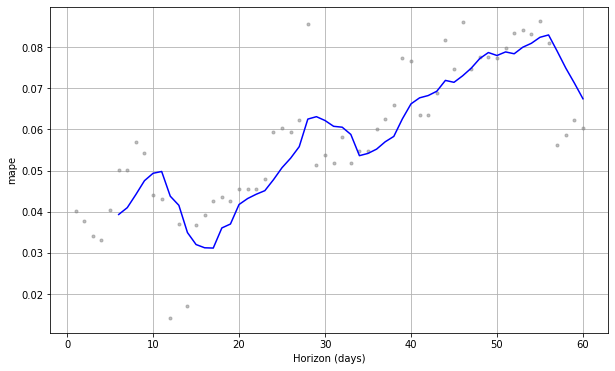

In [99]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [100]:
df_t = pd.read_csv('Soyabean.csv')

In [101]:
df_t.columns = ['ds', 'y']

In [102]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [103]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [104]:
t.fit(df_t)

In [105]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

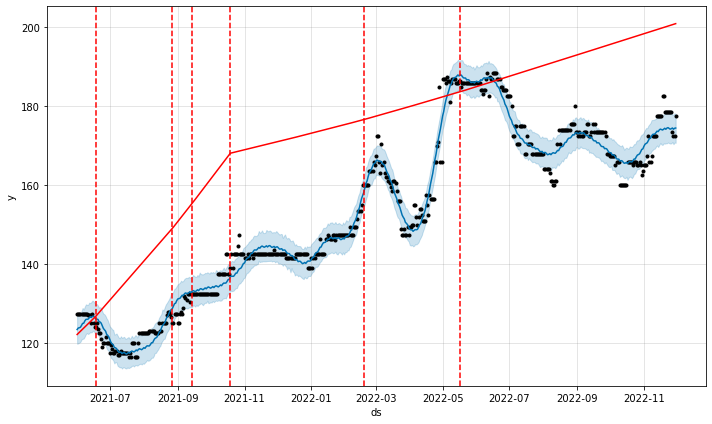

In [106]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [107]:
df_S = pd.read_csv('Soyabean.csv')

In [108]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


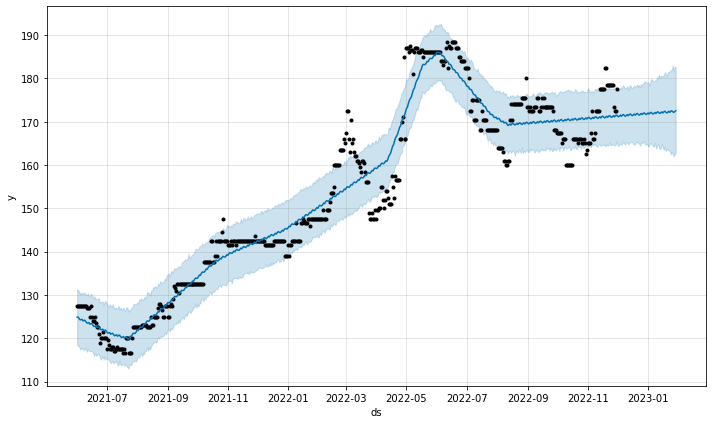

In [109]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

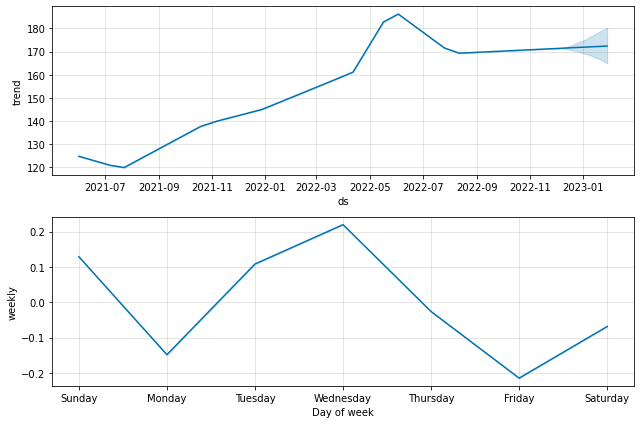

In [110]:
figure = S.plot_components(forecast);

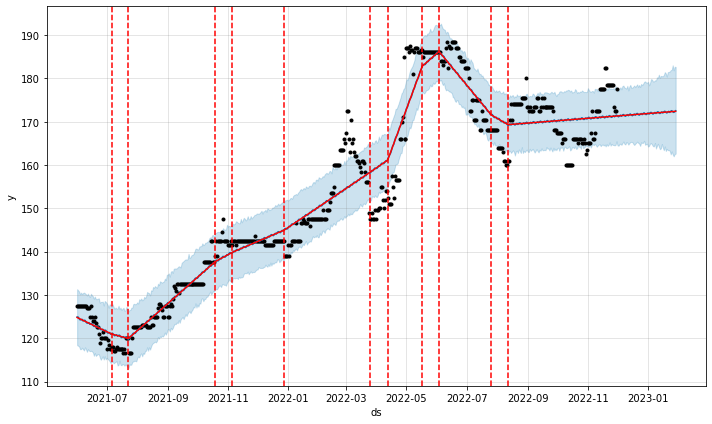

In [111]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


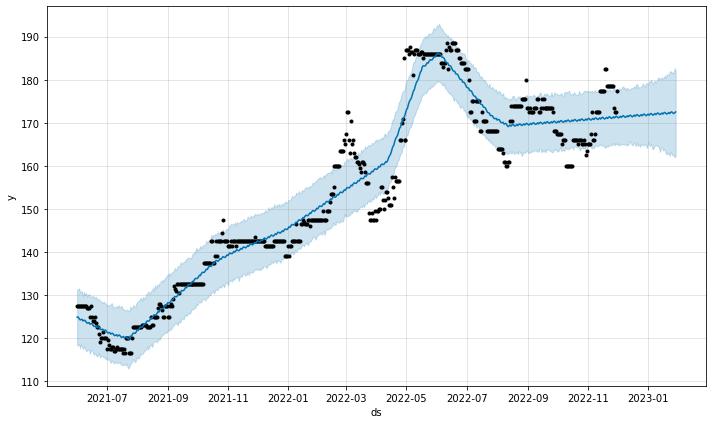

In [112]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

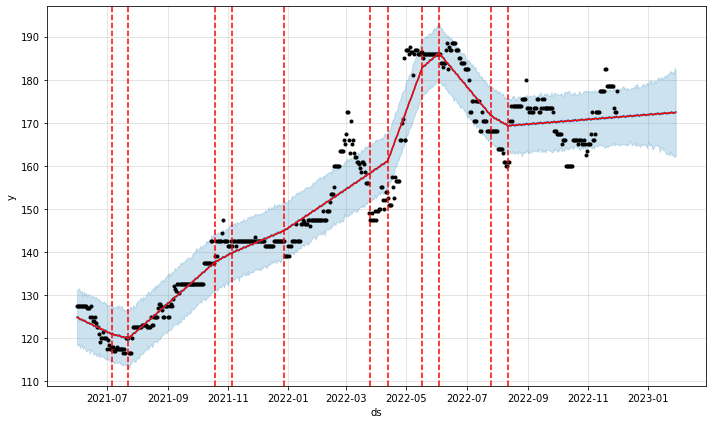

In [113]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

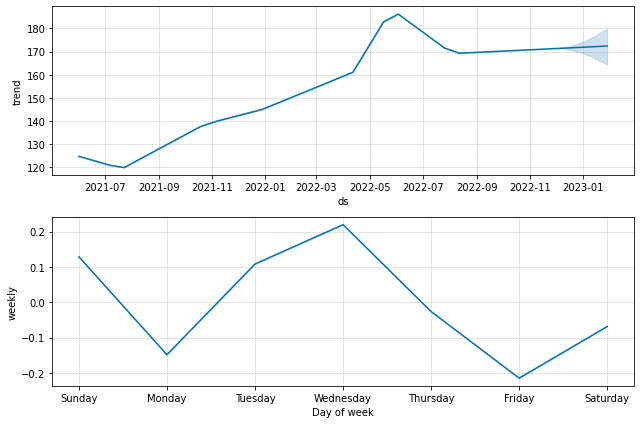

In [114]:
figure = S.plot_components(forecast)

# ***LSTM***

In [115]:
df_LSTM=pd.read_csv("Soyabean.csv",parse_dates=["Date"],index_col=[0])

In [116]:
print(df_LSTM.index.freq)

None


In [117]:
test_split=round(len(df_LSTM)*0.20)

In [118]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [119]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [120]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [121]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [122]:
df_for_training_scaled

array([[0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.14583333],
       [0.14583333],
       [0.14583333],
       [0.11805556],
       [0.15277778],
       [0.11805556],
       [0.10416667],
       [0.10416667],
       [0.11805556],
       [0.09722222],
       [0.08333333],
       [0.08333333],
       [0.0625    ],
       [0.03472222],
       [0.04861111],
       [0.04861111],
       [0.06944444],
       [0.04861111],
       [0.04861111],
       [0.04861111],
       [0.01388889],
       [0.04166667],
       [0.02777778],
       [0.01388889],
       [0.01388889],
       [0.02083333],
       [0.02083333],
       [0.00694444],
       [0.00694444],
       [0.01388889],
       [0.02083333],
       [0.01388889],
       [0.01388889],
       [0.01388889],
       [0.01388889],
       [0.01388889],
       [0.01388889],
       [0.   

In [123]:
df_for_training_scaled.shape

(438, 1)

In [124]:
df_for_testing_scaled.shape

(110, 1)

In [125]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [126]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [127]:
trainX.shape

(408, 30, 1)

In [128]:
testX,testY=createXY(df_for_testing_scaled,30)

In [129]:
trainX[0]

array([[0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.15277778],
       [0.14583333],
       [0.14583333],
       [0.14583333],
       [0.11805556],
       [0.15277778],
       [0.11805556],
       [0.10416667],
       [0.10416667],
       [0.11805556],
       [0.09722222],
       [0.08333333],
       [0.08333333],
       [0.0625    ],
       [0.03472222],
       [0.04861111],
       [0.04861111],
       [0.06944444],
       [0.04861111],
       [0.04861111],
       [0.04861111]])

In [130]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [131]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [132]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.15277778]
 [0.15277778]
 [0.15277778]
 [0.15277778]
 [0.15277778]
 [0.15277778]
 [0.15277778]
 [0.15277778]
 [0.15277778]
 [0.15277778]
 [0.14583333]
 [0.14583333]
 [0.14583333]
 [0.11805556]
 [0.15277778]
 [0.11805556]
 [0.10416667]
 [0.10416667]
 [0.11805556]
 [0.09722222]
 [0.08333333]
 [0.08333333]
 [0.0625    ]
 [0.03472222]
 [0.04861111]
 [0.04861111]
 [0.06944444]
 [0.04861111]
 [0.04861111]
 [0.04861111]]

trainY[0]--  0.013888888888889062


In [133]:
trainY[0]

0.013888888888889062

In [134]:
trainY.shape

(408,)

In [135]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [136]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 9s 205ms/step - loss: 0.1065 - val_loss: 0.0041
Epoch 2/32
13/13 [==============================] - 1s 50ms/step - loss: 0.0248 - val_loss: 0.0068
Epoch 3/32
13/13 [==============================] - 1s 51ms/step - loss: 0.0173 - val_loss: 0.0042
Epoch 4/32
13/13 [==============================] - 1s 53ms/step - loss: 0.0146 - val_loss: 0.0033
Epoch 5/32
13/13 [==============================] - 1s 41ms/step - loss: 0.0103 - val_loss: 0.0032
Epoch 6/32
13/13 [==============================] - 0s 35ms/step - loss: 0.0114 - val_loss: 0.0033
Epoch 7/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0123 - val_loss: 0.0030
Epoch 8/32
13/13 [==============================] - 0s 36ms/step - loss: 0.0094 - val_loss: 0.0045
Epoch 9/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0094 - val_loss: 0.0047
Epoch 10/32
13/13 [==============================] - 0s 34ms/step - loss: 0.0125 - val_loss: 0.0032
Epoch 11

In [138]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 32, 'optimizer': 'adam'}

In [139]:
my_model=grid_search.best_estimator_.model

In [140]:
my_model

In [141]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 13ms/step


In [142]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.7568613 ]
 [0.7619182 ]
 [0.76394624]
 [0.7651606 ]
 [0.7687892 ]
 [0.77050126]
 [0.77405196]
 [0.77521944]
 [0.77469367]
 [0.77292514]
 [0.77042115]
 [0.76765126]
 [0.7649942 ]
 [0.76271474]
 [0.7609586 ]
 [0.7597984 ]
 [0.7576357 ]
 [0.7480417 ]
 [0.7343999 ]
 [0.7193156 ]
 [0.704038  ]
 [0.69043106]
 [0.6796015 ]
 [0.6720898 ]
 [0.6678874 ]
 [0.6628454 ]
 [0.6594356 ]
 [0.6575503 ]
 [0.6570781 ]
 [0.64872557]
 [0.6359535 ]
 [0.6212866 ]
 [0.60685295]
 [0.59425986]
 [0.58448106]
 [0.5779447 ]
 [0.5833258 ]
 [0.59685934]
 [0.6151364 ]
 [0.6349628 ]
 [0.65373045]
 [0.6680868 ]
 [0.6791601 ]
 [0.6865069 ]
 [0.6903205 ]
 [0.689582  ]
 [0.685621  ]
 [0.6812039 ]
 [0.67522806]
 [0.66501355]
 [0.6543827 ]
 [0.64667296]
 [0.64185405]
 [0.6397106 ]
 [0.64352196]
 [0.65879804]
 [0.6707039 ]
 [0.679259  ]
 [0.6864966 ]
 [0.6995681 ]
 [0.7151724 ]
 [0.7310668 ]
 [0.7453892 ]
 [0.7647435 ]
 [0.7852162 ]
 [0.80421907]
 [0.8198155 ]
 [0.83106226]
 [0.84571016]
 [0.860599  ]
 [0.8674

In [143]:
scaler.inverse_transform(prediction)

array([[170.994  ],
       [171.35811],
       [171.50414],
       [171.59157],
       [171.85281],
       [171.97609],
       [172.23174],
       [172.3158 ],
       [172.27795],
       [172.1506 ],
       [171.97032],
       [171.7709 ],
       [171.57957],
       [171.41545],
       [171.28903],
       [171.20547],
       [171.04976],
       [170.359  ],
       [169.37679],
       [168.29073],
       [167.19073],
       [166.21104],
       [165.4313 ],
       [164.89047],
       [164.58789],
       [164.22487],
       [163.97935],
       [163.84363],
       [163.80962],
       [163.20824],
       [162.28865],
       [161.23264],
       [160.19342],
       [159.2867 ],
       [158.58264],
       [158.11203],
       [158.49947],
       [159.47386],
       [160.78983],
       [162.21732],
       [163.56859],
       [164.60225],
       [165.39954],
       [165.9285 ],
       [166.20308],
       [166.1499 ],
       [165.86472],
       [165.54668],
       [165.11642],
       [164.38098],


In [144]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [145]:
prediction_copies_array.shape

(80, 1)

In [146]:
prediction_copies_array

array([[0.7568613 ],
       [0.7619182 ],
       [0.76394624],
       [0.7651606 ],
       [0.7687892 ],
       [0.77050126],
       [0.77405196],
       [0.77521944],
       [0.77469367],
       [0.77292514],
       [0.77042115],
       [0.76765126],
       [0.7649942 ],
       [0.76271474],
       [0.7609586 ],
       [0.7597984 ],
       [0.7576357 ],
       [0.7480417 ],
       [0.7343999 ],
       [0.7193156 ],
       [0.704038  ],
       [0.69043106],
       [0.6796015 ],
       [0.6720898 ],
       [0.6678874 ],
       [0.6628454 ],
       [0.6594356 ],
       [0.6575503 ],
       [0.6570781 ],
       [0.64872557],
       [0.6359535 ],
       [0.6212866 ],
       [0.60685295],
       [0.59425986],
       [0.58448106],
       [0.5779447 ],
       [0.5833258 ],
       [0.59685934],
       [0.6151364 ],
       [0.6349628 ],
       [0.65373045],
       [0.6680868 ],
       [0.6791601 ],
       [0.6865069 ],
       [0.6903205 ],
       [0.689582  ],
       [0.685621  ],
       [0.681

In [147]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [148]:
pred

array([170.994  , 171.35811, 171.50414, 171.59157, 171.85281, 171.97609,
       172.23174, 172.3158 , 172.27795, 172.1506 , 171.97032, 171.7709 ,
       171.57957, 171.41545, 171.28903, 171.20547, 171.04976, 170.359  ,
       169.37679, 168.29073, 167.19073, 166.21104, 165.4313 , 164.89047,
       164.58789, 164.22487, 163.97935, 163.84363, 163.80962, 163.20824,
       162.28865, 161.23264, 160.19342, 159.2867 , 158.58264, 158.11203,
       158.49947, 159.47386, 160.78983, 162.21732, 163.56859, 164.60225,
       165.39954, 165.9285 , 166.20308, 166.1499 , 165.86472, 165.54668,
       165.11642, 164.38098, 163.61555, 163.06046, 162.7135 , 162.55917,
       162.83359, 163.93346, 164.79068, 165.40665, 165.92775, 166.8689 ,
       167.9924 , 169.13681, 170.16803, 171.56154, 173.03555, 174.40378,
       175.5267 , 176.33649, 177.39113, 178.46313, 178.95438, 178.97952,
       178.63933, 178.06052, 177.36592, 176.66039, 176.02107, 174.92679,
       173.54329, 172.10179], dtype=float32)

In [149]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [150]:
pred

array([170.994  , 171.35811, 171.50414, 171.59157, 171.85281, 171.97609,
       172.23174, 172.3158 , 172.27795, 172.1506 , 171.97032, 171.7709 ,
       171.57957, 171.41545, 171.28903, 171.20547, 171.04976, 170.359  ,
       169.37679, 168.29073, 167.19073, 166.21104, 165.4313 , 164.89047,
       164.58789, 164.22487, 163.97935, 163.84363, 163.80962, 163.20824,
       162.28865, 161.23264, 160.19342, 159.2867 , 158.58264, 158.11203,
       158.49947, 159.47386, 160.78983, 162.21732, 163.56859, 164.60225,
       165.39954, 165.9285 , 166.20308, 166.1499 , 165.86472, 165.54668,
       165.11642, 164.38098, 163.61555, 163.06046, 162.7135 , 162.55917,
       162.83359, 163.93346, 164.79068, 165.40665, 165.92775, 166.8689 ,
       167.9924 , 169.13681, 170.16803, 171.56154, 173.03555, 174.40378,
       175.5267 , 176.33649, 177.39113, 178.46313, 178.95438, 178.97952,
       178.63933, 178.06052, 177.36592, 176.66039, 176.02107, 174.92679,
       173.54329, 172.10179], dtype=float32)

In [151]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [170.994   171.35811 171.50414 171.59157 171.85281 171.97609 172.23174
 172.3158  172.27795 172.1506  171.97032 171.7709  171.57957 171.41545
 171.28903 171.20547 171.04976 170.359   169.37679 168.29073 167.19073
 166.21104 165.4313  164.89047 164.58789 164.22487 163.97935 163.84363
 163.80962 163.20824 162.28865 161.23264 160.19342 159.2867  158.58264
 158.11203 158.49947 159.47386 160.78983 162.21732 163.56859 164.60225
 165.39954 165.9285  166.20308 166.1499  165.86472 165.54668 165.11642
 164.38098 163.61555 163.06046 162.7135  162.55917 162.83359 163.93346
 164.79068 165.40665 165.92775 166.8689  167.9924  169.13681 170.16803
 171.56154 173.03555 174.40378 175.5267  176.33649 177.39113 178.46313
 178.95438 178.97952 178.63933 178.06052 177.36592 176.66039 176.02107
 174.92679 173.54329 172.10179]

Original Values--  [172.5 172.5 173.5 175.5 173.5 175.5 173.5 173.5 173.5 173.5 173.5 173.5
 173.5 173.5 173.5 172.5 168.  168.  168.  167.5 167.5 167.5 167.5 167.5
 

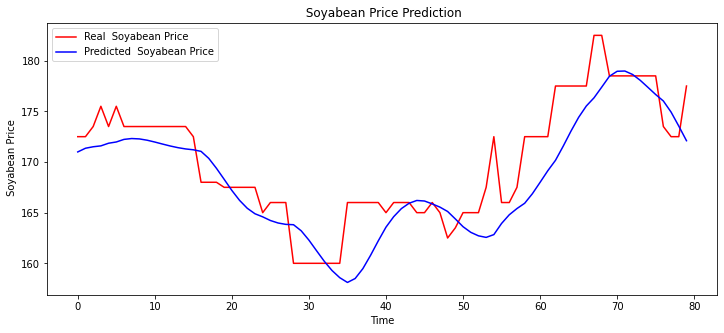

In [152]:
plt.plot(original, color = 'red', label = 'Real  Soyabean Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Soyabean Price')
plt.title(' Soyabean Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Soyabean Price')
plt.legend()
plt.show()

In [153]:
mean_absolute_error(original, pred)

2.489851188659663

In [154]:
mean_squared_error(original, pred)

10.474319843869281

In [155]:
rmse(pred, original)

3.236405389296786